# Subject : MSCI - 719_ Assignment - 7

In [1]:
install.packages("readxl")
install.packages("reshape2")
install.packages("lpSolve", dependencies = TRUE)
install.packages("rpart", dependencies = TRUE)
install.packages("rpart.plot", dependencies = TRUE)



  There is a binary version available but the source version is later:
       binary source needs_compilation
readxl  1.3.1  1.4.2              TRUE

  Binaries will be installed
package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Neel\anaconda3\envs\R\Lib\R\library\00LOCK\readxl\libs\x64\readxl.dll to C:\Users\Neel\anaconda3\envs\R\Lib\R\library\readxl\libs\x64\readxl.dll: Permission denied"Warning message:
"restored 'readxl'"


The downloaded binary packages are in
	C:\Users\Neel\AppData\Local\Temp\RtmpcbMszQ\downloaded_packages
package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Neel\anaconda3\envs\R\Lib\R\library\00LOCK\reshape2\libs\x64\reshape2.dll to C:\Users\Neel\anaconda3\envs\R\Lib\R\library\reshape2\libs\x64\reshape2.dll: Permission denied"Warning message:
"restored 'reshape2'"


The downloaded binary packages are in
	C:\Users\Neel\AppData\Local\Temp\RtmpcbMszQ\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
lpSolve 5.6.15 5.6.18              TRUE

  Binaries will be installed
package 'lpSolve' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lpSolve'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Neel\anaconda3\envs\R\Lib\R\library\00LOCK\lpSolve\libs\x64\lpSolve.dll to C:\Users\Neel\anaconda3\envs\R\Lib\R\library\lpSolve\libs\x64\lpSolve.dll: Permission denied"Warning message:
"restored 'lpSolve'"


The downloaded binary packages are in
	C:\Users\Neel\AppData\Local\Temp\RtmpcbMszQ\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
rpart 4.1-15 4.1.19              TRUE

  Binaries will be installed
package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Neel\anaconda3\envs\R\Lib\R\library\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\Neel\anaconda3\envs\R\Lib\R\library\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\Neel\AppData\Local\Temp\RtmpcbMszQ\downloaded_packages

  There is a binary version available but the source version is later:
           binary source needs_compilation
rpart.plot  3.0.9  3.1.1             FALSE



installing the source package 'rpart.plot'



# Q1 : Compare Demand prediction results of Regression Tree and Linear Regression Methods

In [2]:
library(readxl)
library(ggplot2)
library(reshape2)
library("lpSolve")
library(rpart)
library(rpart.plot)

Warning message:
"package 'readxl' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'lpSolve' was built under R version 3.6.2"Warning message:
"package 'rpart' was built under R version 3.6.3"

In [3]:
#Reading excel to get data.
data <- read_excel("C:\\Users\\Neel\\Desktop\\Operations Analytics\\Assignment_07\\Part_2_01.xlsx")
# Split data into training and testing sets
#Freezing train and test data using setseed
set.seed(212)
train_index <- sample(1:nrow(data), nrow(data) * 0.9)
df <- data[train_index, ]
test_data <- data[-train_index, ]
#Checking number of rows of train dataset to crosscheck split
print(nrow(df))

[1] 2201


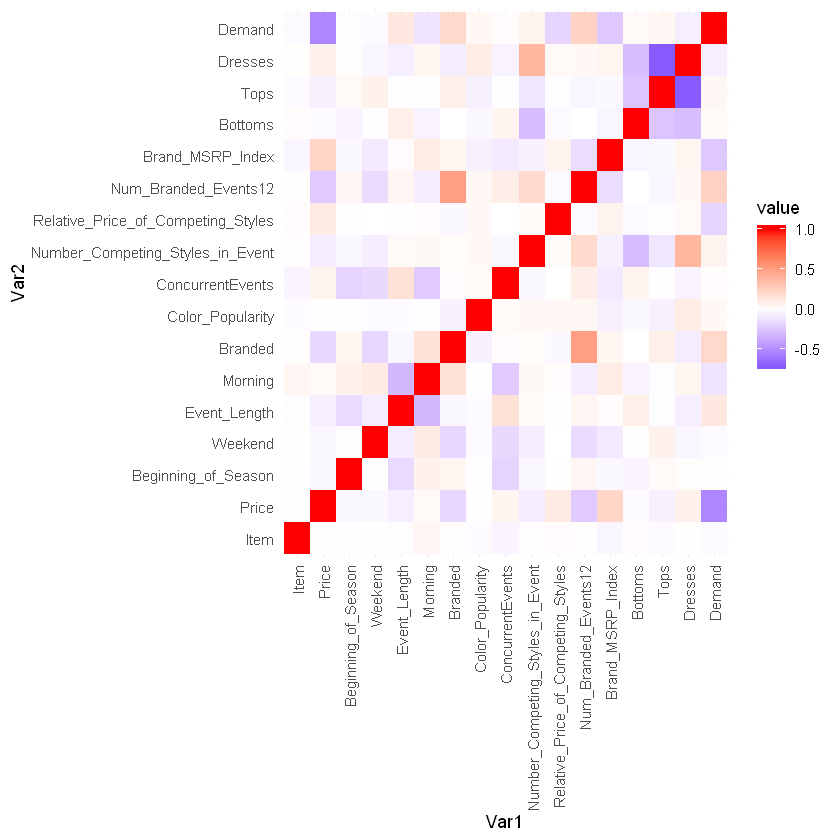

In [4]:
# Correlation matrix for determining co-relation of fields
corr_matrix <- cor(df)
# Corelation heat map for visualizing co-relation
ggplot(data = melt(corr_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))

In [5]:
#So based on above analysis we will not take columns Num_Braded_Events12 and Dresses while making Linear Regression model
#Multi-linear Regression model building:
model <- lm(Demand ~ Price + Beginning_of_Season + Weekend + Event_Length + Morning + Branded + Color_Popularity + ConcurrentEvents + Number_Competing_Styles_in_Event + Relative_Price_of_Competing_Styles + Brand_MSRP_Index + Bottoms + Tops, data = df)
summary(model)


Call:
lm(formula = Demand ~ Price + Beginning_of_Season + Weekend + 
    Event_Length + Morning + Branded + Color_Popularity + ConcurrentEvents + 
    Number_Competing_Styles_in_Event + Relative_Price_of_Competing_Styles + 
    Brand_MSRP_Index + Bottoms + Tops, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3226.5  -924.6  -314.2   452.7 15969.8 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        12208.805    433.309  28.176  < 2e-16 ***
Price                               -215.866      8.907 -24.235  < 2e-16 ***
Beginning_of_Season                   15.133     77.648   0.195 0.845493    
Weekend                              -11.877    103.073  -0.115 0.908273    
Event_Length                         308.785     83.200   3.711 0.000211 ***
Morning                             -765.435    164.071  -4.665 3.27e-06 ***
Branded                              718.375     94.811   7.577 5.19e-14 ***


In [6]:
#Displaying summary of model that consists of intercept, co-efficients and std.error
summary(model)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12208.804835,433.308829,28.1757583,2.810068e-149
Price,-215.866250,8.907052,-24.2354320,3.936623e-115
Beginning_of_Season,15.133115,77.647556,0.1948949,8.454933e-01
Weekend,-11.877173,103.072879,-0.1152308,9.082727e-01
Event_Length,308.785136,83.199892,3.7113646,2.112929e-04
Morning,-765.434621,164.070708,-4.6652729,3.268286e-06
Branded,718.374940,94.811180,7.5769012,5.191407e-14
Color_Popularity,703.536192,318.401536,2.2095879,2.723703e-02
ConcurrentEvents,-9.755087,36.395650,-0.2680289,7.887023e-01
Number_Competing_Styles_in_Event,3.001752,2.251054,1.3334872,1.825108e-01


In [7]:
#Predicting demand on 10% test dataset using Linear Regression
Demand_linear_reg <- predict(model,test_data)
head(Demand_linear_reg)

1        2        3        4        5        6 
6088.227 6879.674 5187.884 5892.957 3189.143 4736.408

n= 2201 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 2201 9093857000  4837.558  
   2) Price>=30.5 893  118040100  3387.254 *
   3) Price< 30.5 1308 5815128000  5827.712  
     6) Brand_MSRP_Index>=0.5241499 1194 3972699000  5674.785  
      12) Event_Length< 3.5 1182 3743875000  5646.299 *
      13) Event_Length>=3.5 12  133391400  8480.639 *
     7) Brand_MSRP_Index< 0.5241499 114 1522044000  7429.414  
      14) Number_Competing_Styles_in_Event< 44 102  823279800  6851.148  
        28) Brand_MSRP_Index>=0.265226 92  435369700  6477.533 *
        29) Brand_MSRP_Index< 0.265226 10  256920700 10288.410 *
      15) Number_Competing_Styles_in_Event>=44 12  374738200 12344.680 *

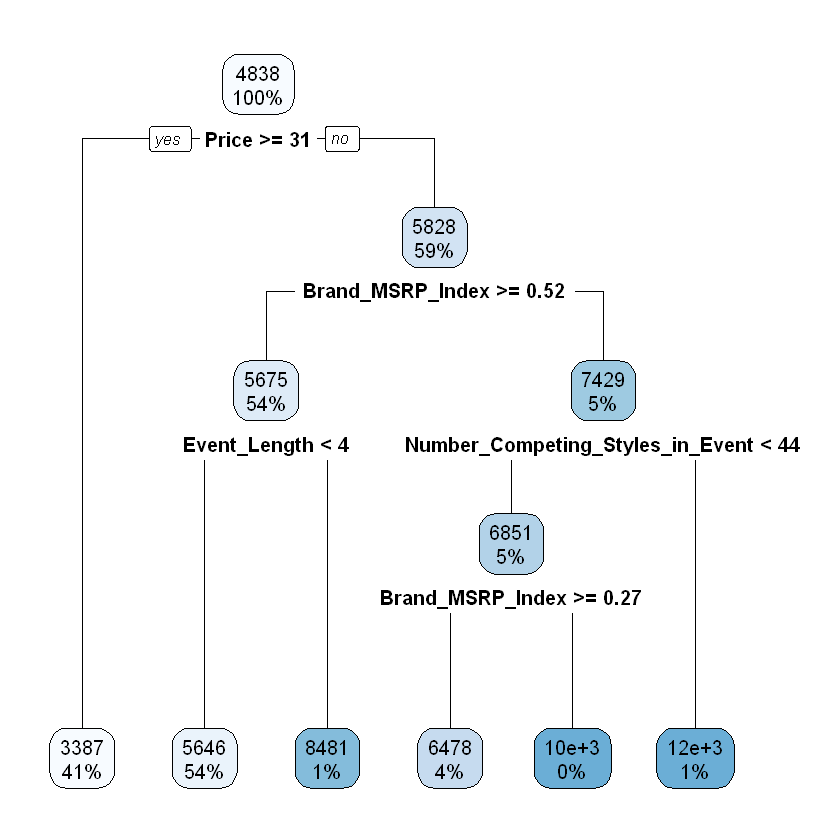

In [8]:
#Regression Tree model building
reg_tree= rpart(formula = Demand~ .-Item , data = df, method = "anova")
reg_tree
#Visualize Regression tree
rpart.plot(reg_tree)

In [9]:
#Evaluate Regression tree through MSE calculation
reg_tree_pred <- predict(reg_tree, newdata = test_data)
reg_tree_mse <- mean((test_data$Demand - reg_tree_pred)^2)
reg_tree_mse

[1] 2289839

In [10]:
#Evaluate Linear Regression through MSE calculation
Linear_reg_mse <- mean((test_data$Demand - Demand_linear_reg)^2)
Linear_reg_mse

[1] 2738002

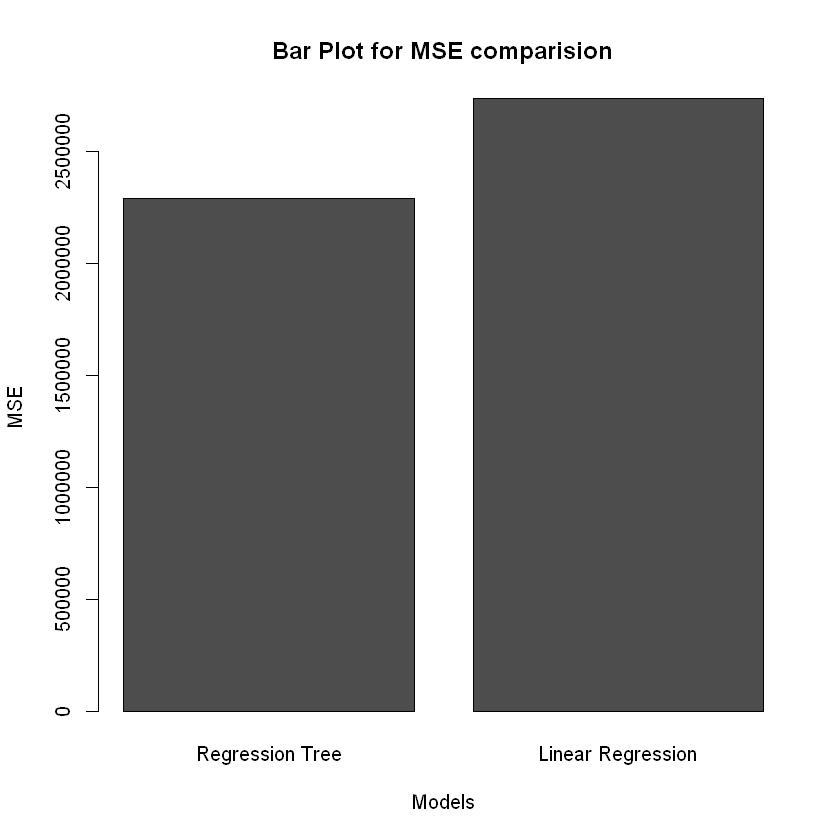

In [11]:
values <- cbind(reg_tree_mse,Linear_reg_mse)
colnames(values) <- c("Regression Tree", "Linear Regression")
rownames(values) <- ("Mean Square Error (MSE)")
# Create a bar plot of the values
barplot(
  values,
  xlab = "Models",
  ylab = "MSE",
  main = "Bar Plot for MSE comparision",
  args.legend = colnames(values)
)

#### Here MSE of Linear Regression model is more than MSE of Regression Tree for predicting demand on 10% Test Data

In [12]:
#Importing Execel file to predict optimal price for item A, item B and item C. Here Item 1 = Item A, Item 2 = Item B and Item 3 = Item C.
Data_test= read_excel(file.choose())
head(Data_test)

Item,Beginning_of_Season,Weekend,Event_Length,Morning,Branded,Color_Popularity,ConcurrentEvents,Number_Competing_Styles_in_Event,Num_Branded_Events12,Brand_MSRP_Index,Bottoms,Tops,Dresses
1,1,0,2,0,1,0.17,2,3,2,0.870289,0,1,0
2,1,0,2,0,0,0.65,2,3,1,0.330000,0,1,0
3,1,0,2,0,1,0.08,2,3,1,1.184811,0,1,0


In [13]:
#Making Price vector
Prices= c(25, 30, 35)
P = rep(Prices, nrow(Data_test))
P
Items_names <- c("A","A","A","B","B","B","C","C","C")

[1] 25 30 35 25 30 35 25 30 35

In [14]:
#Making k vector that consists of all possible values of k
possible_k= seq(nrow(Data_test)*min(Prices), nrow(Data_test)*max(Prices), by=5)
possible_k

[1]  75  80  85  90  95 100 105

In [15]:
#Repeting test data in new rows for predicting at different prices (25,30,35). 
Data_test2= Data_test[rep(seq_len(nrow(Data_test)), each = 3), ]
Data_test2

Item,Beginning_of_Season,Weekend,Event_Length,Morning,Branded,Color_Popularity,ConcurrentEvents,Number_Competing_Styles_in_Event,Num_Branded_Events12,Brand_MSRP_Index,Bottoms,Tops,Dresses
1,1,0,2,0,1,0.17,2,3,2,0.870289,0,1,0
1,1,0,2,0,1,0.17,2,3,2,0.870289,0,1,0
1,1,0,2,0,1,0.17,2,3,2,0.870289,0,1,0
2,1,0,2,0,0,0.65,2,3,1,0.330000,0,1,0
2,1,0,2,0,0,0.65,2,3,1,0.330000,0,1,0
2,1,0,2,0,0,0.65,2,3,1,0.330000,0,1,0
3,1,0,2,0,1,0.08,2,3,1,1.184811,0,1,0
3,1,0,2,0,1,0.08,2,3,1,1.184811,0,1,0
3,1,0,2,0,1,0.08,2,3,1,1.184811,0,1,0


In [16]:
#Displaying column names of test data
colnames(Data_test2)

[1] "Item"                             "Beginning_of_Season"             
 [3] "Weekend"                          "Event_Length"                    
 [5] "Morning"                          "Branded"                         
 [7] "Color_Popularity"                 "ConcurrentEvents"                
 [9] "Number_Competing_Styles_in_Event" "Num_Branded_Events12"            
[11] "Brand_MSRP_Index"                 "Bottoms"                         
[13] "Tops"                             "Dresses"

In [17]:
#Building demand_pred, objectives and solutions vectors for displaying solution when predicting through regression trees.
Demand_pred= vector(mode= "numeric")
Objectives= vector(mode= "numeric")
Solutions= matrix(nrow= length(possible_k), ncol= length(Prices)*nrow(Data_test))

In [18]:
#Running for loop in order to solve optimization model for all values of k
for (n in 1:length(possible_k)){
    for (i in 1:length(P)){
        Data_test2$Price= P[i]
        Data_test2$Relative_Price_of_Competing_Styles= P[i]/(possible_k[n]/3)
        Demand_pred[i]= predict(reg_tree, Data_test2[i,])
    }
    Obj_coeff= Demand_pred*P
    Cons_coeff= matrix(c(1,1,1,0,0,0,0,0,0,
                         0,0,0,1,1,1,0,0,0,
                         0,0,0,0,0,0,1,1,1,
                         P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9]), nrow=4, byrow=TRUE)
    Dir = c("==",
            "==",
            "==",
            "==")
    RHS= c(1,1,1, possible_k[n])
    Model= lp("max", Obj_coeff, Cons_coeff, Dir, RHS, all.bin= TRUE)
    Objectives[n]= Model$objval
    Solutions[n,]= Model$solution
}
Demand_pred
#Demand prediction using Regression tree for different value of k

[1] 5646.299 5646.299 3387.254 6477.533 6477.533 3387.254 5646.299 5646.299
[9] 3387.254

In [19]:
#Displaying solutions of LP for different values of k
cbind(Solutions,possible_k) 

,,,,,,,,,possible_k
1,0,0,1,0,0,1,0,0,75
1,0,0,0,1,0,1,0,0,80
0,1,0,0,1,0,1,0,0,85
0,1,0,0,1,0,0,1,0,90
0,0,1,0,1,0,0,1,0,95
0,0,1,0,1,0,0,0,1,100
0,0,1,0,0,1,0,0,1,105


In [20]:
#Displaying Objective values for all possible k values
cbind(Objectives, possible_k)

Objectives,possible_k
444253.3,75
476640.9,80
504872.4,85
533103.9,90
482268.8,95
431433.7,100
355661.6,105


In [21]:
#Displaying solution and objective values for all k
cbind(cbind(Solutions, Objectives),possible_k)

,,,,,,,,,Objectives,possible_k
1,0,0,1,0,0,1,0,0,444253.3,75
1,0,0,0,1,0,1,0,0,476640.9,80
0,1,0,0,1,0,1,0,0,504872.4,85
0,1,0,0,1,0,0,1,0,533103.9,90
0,0,1,0,1,0,0,1,0,482268.8,95
0,0,1,0,1,0,0,0,1,431433.7,100
0,0,1,0,0,1,0,0,1,355661.6,105


In [123]:
# From above visual, the maximum revenue occurs at k = 90. Thus solution will be price of A, B and C is $30,
cbind(cbind(Solutions[match(max(Objectives),Objectives),],Items_names),P)

,Items_names,P
0,A,25
1,A,30
0,A,35
0,B,25
1,B,30
0,B,35
0,C,25
1,C,30
0,C,35


### Optimal price value for item A, item B and item C is 30 that maximizes revenue (R = 533103.9). 

### This optimal value is based on Regression tree demand prediction

# Q2 : Determining Optimal price using Linear Regression and Comparing

## Predicting price of Item A, Item B and Item C using Linear Regression Model

In [56]:
#Building demand_pred_2, objectives_2 and solutions_2 vectors for displaying solution when predicting through Linear Regression model.
Demand_pred_2= vector(mode= "numeric")
Objectives_2= vector(mode= "numeric")
Solutions_2= matrix(nrow= length(possible_k), ncol= length(Prices)*nrow(Data_test))

In [60]:
#Running for loop in order to solve optimization model for all values of k
for (n in 1:length(possible_k)){
    for (i in 1:length(P)){
        Data_test2$Price= P[i]
        Data_test2$Relative_Price_of_Competing_Styles= P[i]/(possible_k[n]/3)
        Demand_pred_2[i]= predict(model, Data_test2[i,])
    }
    Obj_coeff= Demand_pred_2*P
    Cons_coeff= matrix(c(1,1,1,0,0,0,0,0,0,
                         0,0,0,1,1,1,0,0,0,
                         0,0,0,0,0,0,1,1,1,
                         P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9]), nrow=4, byrow=TRUE)
    Dir = c("==",
            "==",
            "==",
            "==")
    RHS= c(1,1,1, possible_k[n])
    Model= lp("max", Obj_coeff, Cons_coeff, Dir, RHS, all.bin= TRUE)
    Objectives_2[n]= Model$objval
    Solutions_2[n,]= Model$solution
}
Demand_pred_2


[1] 7261.020 6053.725 4846.430 7122.557 5915.262 4707.967 7056.700 5849.405
[9] 4642.110

In [86]:
#Displaying solutions of LP for different values of k
cbind(Solutions_2,possible_k)

,,,,,,,,,possible_k
1,0,0,1,0,0,1,0,0,75
0,1,0,1,0,0,1,0,0,80
0,1,0,0,1,0,1,0,0,85
0,1,0,0,1,0,0,1,0,90
0,0,1,0,1,0,0,1,0,95
0,0,1,0,0,1,0,1,0,100
0,0,1,0,0,1,0,0,1,105


In [87]:
#Displaying Objective values for all possible k values
cbind(Objectives_2, possible_k)

Objectives_2,possible_k
516812.4,75
518898.1,80
520884.2,85
523035.1,90
514415.8,95
505599.3,100
496877.8,105


In [93]:
#Displaying solution and objective values for all k
cbind(cbind(Solutions_2, Objectives_2),possible_k)

,,,,,,,,,Objectives_2,possible_k
1,0,0,1,0,0,1,0,0,516812.4,75
0,1,0,1,0,0,1,0,0,518898.1,80
0,1,0,0,1,0,1,0,0,520884.2,85
0,1,0,0,1,0,0,1,0,523035.1,90
0,0,1,0,1,0,0,1,0,514415.8,95
0,0,1,0,0,1,0,1,0,505599.3,100
0,0,1,0,0,1,0,0,1,496877.8,105


In [124]:
# From above visual, the maximum revenue occurs at k = 90. Thus solution will be price of A, B and C is $30
cbind(cbind(Solutions_2[match(max(Objectives_2),Objectives_2),],Items_names),P)

,Items_names,P
0,A,25
1,A,30
0,A,35
0,B,25
1,B,30
0,B,35
0,C,25
1,C,30
0,C,35


### Optimal price value for item A, item B and item C is 30 that maximizes revenue (R = 523035). 

### This optimal value is based on Linear Regression Demand prediction

#### Thus on comparing results of optimal price prediction through both models, we can say that the optimal price is same.

#### However, the Revenue determination using both models is slight different. 
#### From Regression tree model we get Optimal revenue for the optimal price as 533103.9
#### From Linear Regression model, we get Optimal revenue for the optimal price as 523035

# Q3 : Adding Assumptions to obtain optimal price for new items

## Adding constraint that price of A cannot be 25
## The other contraint that price of B and C cannot be 45 is not added as upper limit is 35.

In [67]:
#Building demand_pred_3, objectives_3 and solutions_3 vectors for displaying solution when predicting through regression trees.
Demand_pred_3= vector(mode= "numeric")
Objectives_3= vector(mode= "numeric")
Solutions_3= matrix(nrow= length(possible_k), ncol= length(Prices)*nrow(Data_test))

In [68]:
#Running for loop in order to solve optimization model for all values of k
for (n in 1:length(possible_k)){
    for (i in 1:length(P)){
        Data_test2$Price= P[i]
        Data_test2$Relative_Price_of_Competing_Styles= P[i]/(possible_k[n]/3)
        Demand_pred_3[i]= predict(reg_tree, Data_test2[i,])
    }
    Obj_coeff= Demand_pred_3*P
    Cons_coeff= matrix(c(1,1,1,0,0,0,0,0,0,
                         0,0,0,1,1,1,0,0,0,
                         0,0,0,0,0,0,1,1,1,
                         1,0,0,0,0,0,0,0,0,
                         P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9]), nrow=5, byrow=TRUE)
    Dir = c("==",
            "==",
            "==",
            "==",
            "==")
    RHS= c(1,1,1,0, possible_k[n])
    Model= lp("max", Obj_coeff, Cons_coeff, Dir, RHS, all.bin= TRUE)
    Objectives_3[n]= Model$objval
    Solutions_3[n,]= Model$solution
}
Demand_pred_3

[1] 5646.299 5646.299 3387.254 6477.533 6477.533 3387.254 5646.299 5646.299
[9] 3387.254

In [90]:
#Displaying solutions of LP for different values of k
cbind(Solutions_3,possible_k)

,,,,,,,,,possible_k
0,0,0,0,0,0,0,0,0,75
0,1,0,1,0,0,1,0,0,80
0,1,0,0,1,0,1,0,0,85
0,1,0,0,1,0,0,1,0,90
0,0,1,0,1,0,0,1,0,95
0,0,1,0,1,0,0,0,1,100
0,0,1,0,0,1,0,0,1,105


In [91]:
#Displaying Objective values for all possible k values
cbind(Objectives_3, possible_k)

Objectives_3,possible_k
0.0,75
472484.8,80
504872.4,85
533103.9,90
482268.8,95
431433.7,100
355661.6,105


In [92]:
#Displaying solution and objective values for all k
cbind(cbind(Solutions_3, Objectives_3),possible_k)

,,,,,,,,,Objectives_3,possible_k
0,0,0,0,0,0,0,0,0,0.0,75
0,1,0,1,0,0,1,0,0,472484.8,80
0,1,0,0,1,0,1,0,0,504872.4,85
0,1,0,0,1,0,0,1,0,533103.9,90
0,0,1,0,1,0,0,1,0,482268.8,95
0,0,1,0,1,0,0,0,1,431433.7,100
0,0,1,0,0,1,0,0,1,355661.6,105


In [125]:
# From above visual, the maximum revenue occurs at k = 90. Thus solution will be price of A, B and C is $30
cbind(cbind(Solutions_3[match(max(Objectives_3),Objectives_3),],Items_names),P)

,Items_names,P
0,A,25
1,A,30
0,A,35
0,B,25
1,B,30
0,B,35
0,C,25
1,C,30
0,C,35


### Optimal price value for item A, item B and item C is 30 that maximizes revenue (R = 533103.9) even having constraint on price of A.

### Thus adding constraint donot change the optimal price of new items.